In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
from psi_praktikum.__main__ import *

## Find the parameters of the fit between TDC bin numbers and times.

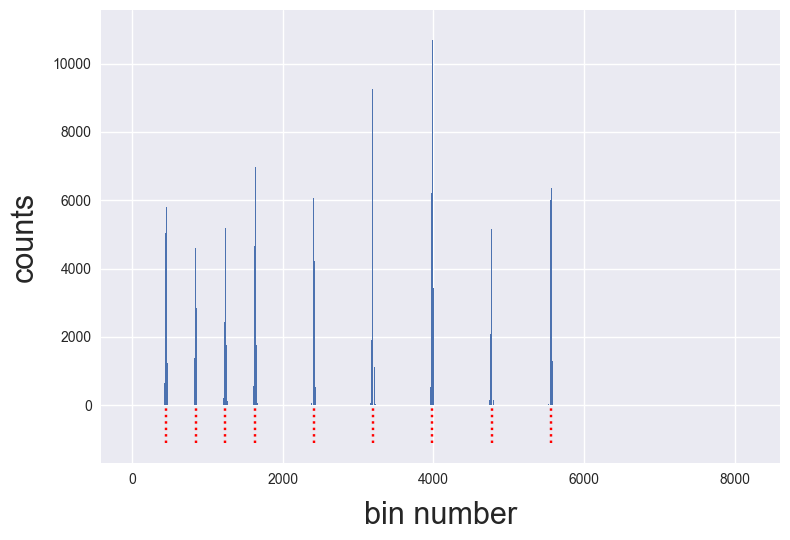

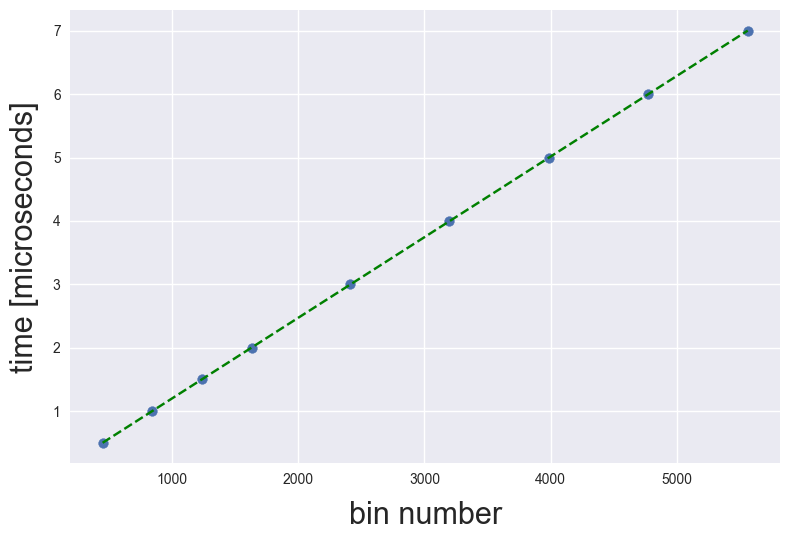

The parameters are [p_1, p_2]=[ 0.00127266 -0.07273329]


In [3]:
parameters = fit_calibration(
    "TimeCalibration_delaytrigger_05to7us.Spe",
    # "TimeCalibration_stepof32ns.Spe",
    times = [
        0.5,
        1,
        1.5,
        2,
        3,
        4,
        5,
        6,
        7,
    ],
    visualize=True,
)

print(f"The parameters are [p_1, p_2]={parameters}")

## Test the fit on a simulated distribution

/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:55: RuntimeWarning: overflow encountered in exp
  np.exp(- (t_shifted / t_mu))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:110: RuntimeWarning: overflow encountered in square
  return np.sum(residuals**2)
/opt/homebrew/Caskroom/miniforge/base/envs/psi-praktikum/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:56: RuntimeWarning: overflow encountered in exp
  - np.exp(- (t_shifted / t_pi))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:55: RuntimeWarning: invalid value encountered in subtract
  np.exp(- (t_shifted / t_mu))
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:54: RuntimeWarning: invalid value encountered in multiply
  f1 = N0 * (
/Users/max/repos/uzh/psi-praktikum/psi_praktikum/__main__.py:54: RuntimeWarning: overflow encountere

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: 150654.877597096
       x: [ 8.239e-01  1.641e-06  6.000e+01  2.073e-06  1.568e-07]
     nit: 1000
    nfev: 17285
    njev: 1214
    nhev: 0


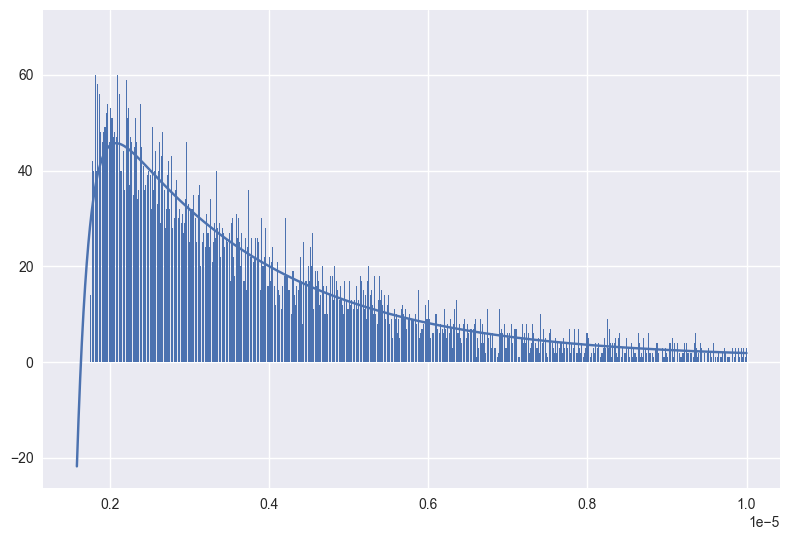

In [4]:
fit_simulated(
    fit_function=ff5,
    bounds=[
        (0., 10),
        (1e-6, 5e-6),
        (0., 60),
        (1e-10, 1e-5),
        (1e-10, 1e-5),
    ]
)

## Fit to the real data

In [5]:
BOUNDS=(
    # (0, 10),
    # (0, 1e-5),
    # (0., 1e2),
    # (0, 1e-2),
    # (0, 1e-5),
    (0., 10),  # time gaus amplitude
    (0., 100),  # time gaus sigma
    (0., 2),  # y shift
    (0., 20),  # hadronic gaus amplitude
    (0., 100),  # hadronic gaus sigma
    (0., 1e-5),  # t0
    (0., 1e3),  # N0
    (0., 1e-5),  # t_mu
    (0., 1e-7),  # t_pi
)

[2.13174028e+00 2.06552730e+01 2.00000000e+00 1.50042551e+01
 8.67914429e+01 4.69182362e-06 4.15057907e+02 7.38893380e-06
 9.68867812e-08]


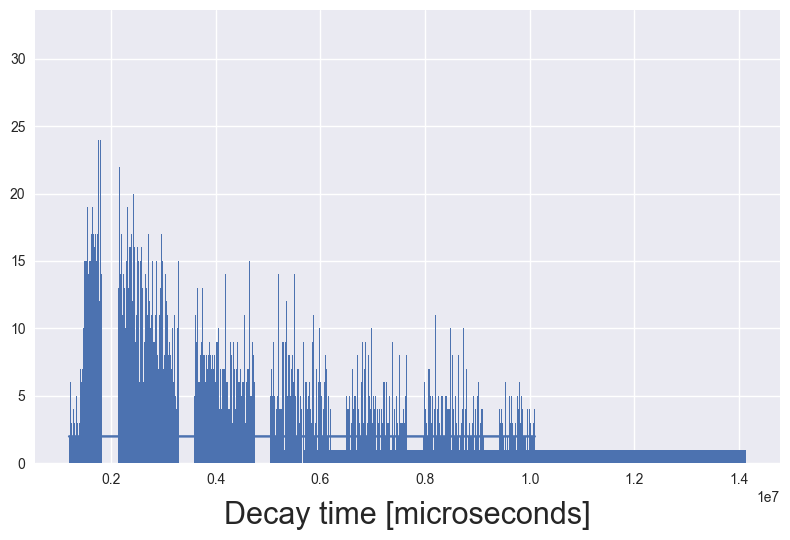

In [6]:
fit_data(
    "stop_S6andS7_delay_1_5_mus_fs12_50and100mm_30min.Spe",
    fit_function=ff,
    bounds=BOUNDS
)

[7.06269086e+00 9.44884548e+00 2.00000000e+00 1.96102952e+01
 2.04743874e+01 4.97468887e-06 6.55501193e+02 8.36729464e-06
 1.73345293e-08]


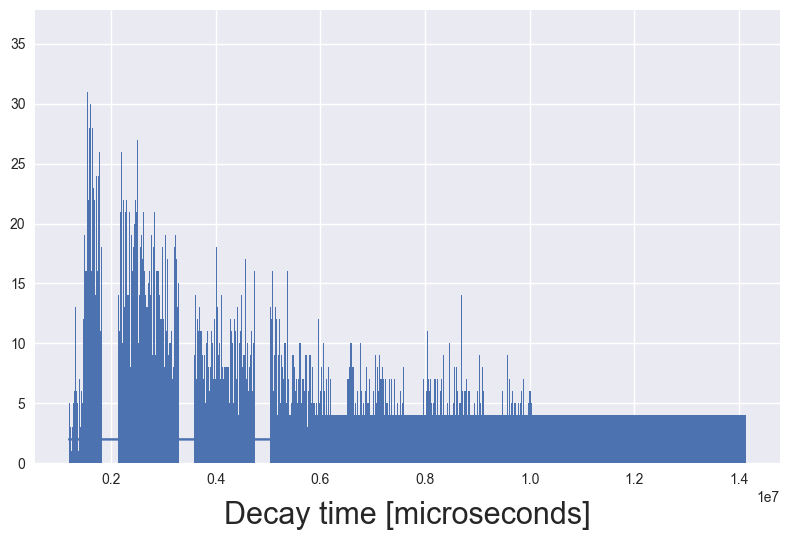

In [7]:
fit_data(
    "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_60min_timinggivenbys7.Spe",
    fit_function=ff,
    bounds=BOUNDS
)

[5.52644116e+00 6.30399115e+01 1.14847062e+00 1.69567318e+01
 1.92369864e+01 4.25340023e-06 5.92117970e+02 6.69210408e-06
 4.72713664e-08]


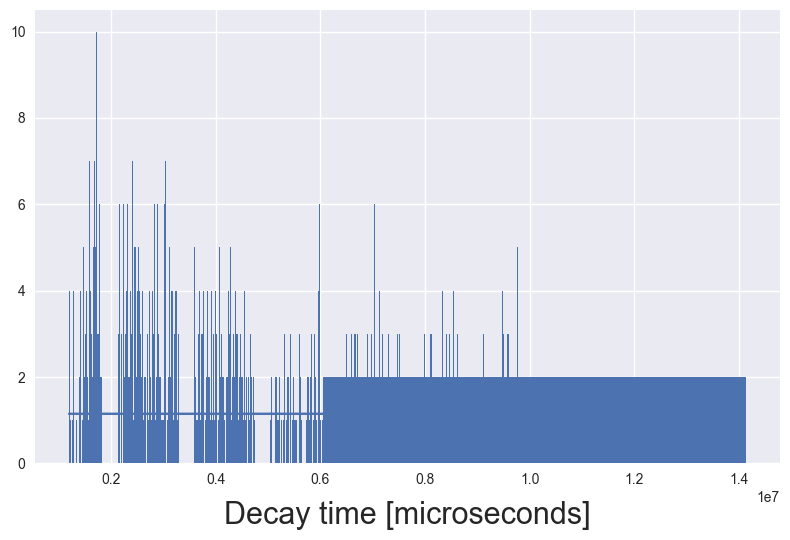

In [8]:

fit_data(
    "PSI_lab_2025/stop_S6andS7_delay_1_5_mus_fs12_135mm_timinggivenbys7_CFD_allstat.Spe",
    fit_function=ff,
    bounds=BOUNDS
)